<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Cat_vs_Dog_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.regularizers import L2
from keras.utils import image_dataset_from_directory
from keras.callbacks import EarlyStopping

In [5]:
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')
zip_ref.extractall('my_data')
zip_ref.close()

In [6]:
train_ds = image_dataset_from_directory(
    "/content/my_data/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary',
)

Found 20000 files belonging to 2 classes.


In [7]:
test_ds = image_dataset_from_directory(
    "/content/my_data/test",
    batch_size=32,
    image_size=(150, 150),
    label_mode='binary',
)

Found 5000 files belonging to 2 classes.


In [8]:
def processing(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(processing)
test_ds = test_ds.map(processing)

In [9]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, (3,3), activation="relu", input_shape = (150, 150, 3), kernel_regularizer=L2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2) ))

  model.add(Conv2D(63, (3,3), activation="relu", input_shape = (150, 150, 3), kernel_regularizer=L2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(128, (3,3), activation="relu", input_shape = (150, 150, 3), kernel_regularizer=L2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))


  model.add(Flatten())

  model.add(Dense(128, activation="relu", input_dim = (150, 150, 3), kernel_regularizer=L2(0.01)))
  model.add(Dropout(0.3))

  model.add(Dense(64, activation="relu", kernel_regularizer=L2(0.01)))
  model.add(Dropout(0.3))

  model.add(Dense(32, activation="relu", kernel_regularizer=L2(0.01)))
  model.add(Dropout(0.3))

  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

  return model

In [10]:
model = create_model()

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 63)     │        18,207 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 63)     │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 63)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,838,172 (18.46 MB)

 Trainable params: 4,837,726 (18.45 MB)

 Non-trainable params: 446 (1.74 KB)

In [12]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=EarlyStopping(patience=6))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.5265 - loss: 5.5262 - val_accuracy: 0.5622 - val_loss: 1.6171
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.6291 - loss: 1.4322 - val_accuracy: 0.6440 - val_loss: 1.1034
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7123 - loss: 0.9756 - val_accuracy: 0.6690 - val_loss: 0.8980
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7310 - loss: 0.8329 - val_accuracy: 0.7156 - val_loss: 0.8564
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.7613 - loss: 0.7808 - val_accuracy: 0.6990 - val_loss: 0.8242
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.7700 - loss: 0.7758 - val_accuracy: 0.7540 - val_loss: 0.8315
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7773 - loss: 0.8004 - val_accuracy: 0.6656 - val_loss: 0.9485
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7850 - loss: 0.8210 - 

Text(0.5, 0, 'epoch')

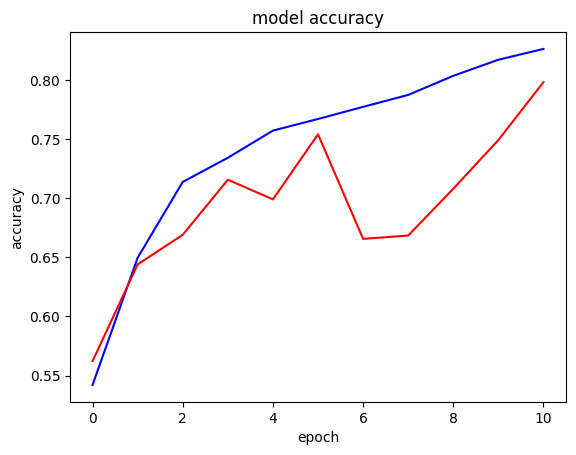

In [13]:
plt.plot(history.history['accuracy'], color="blue")
plt.plot(history.history['val_accuracy'], color ="red")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')